In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from scipy.stats import chi2

In [2]:
# construct random generator 
rng = np.random.default_rng(12345)

# 1. Linear Time Series

A time series $r_t$ is said to be linear if it can be written as
$$r_t = \mu + \sum_{i=0} ^\infty \psi_i a_{t-i} $$

where $\mu$ is the mean of $r_t$, $\psi_0 = 1$, and $\{a_t\}$ is a sequence of white noise. $a_t$ denotes the new information at time $t$ of the time series and is often referred to as the **innovation** or **shock** at time $t$.

- $E(r_t) = \mu$
- $Var(r_t) = \sigma_a ^2 \sum_{i=0} ^\infty \psi_i ^2$

where $\sigma_a ^2$ is the variance of $a_t$. 

\begin{align}
\gamma_l = Cov(r_t, r_{t-l}) & = E[(\sum_{i=0} ^\infty \psi_i a_{t-i}) (\sum_{j=0} ^\infty \psi_j a_{t-l-j})] \\
& = E(\sum_{i, j =0} ^\infty \psi_i \psi_j a_{t-i} a_{t-l-j}) \\
& = \sum_{j=0} ^\infty \psi_{j+l} \psi_j E(a_{t-l-j} ^2) \\
& = \sigma_a ^2 \sum_{j=0} ^\infty \psi_j \psi_{j+l}.
\end{align}

Consequently, the $\psi$ weights are related to the autocorrelations of $r_t$ as follows:
$$ \rho_l = \frac{\gamma_l}{\gamma_0} = \frac{\sum_{i=0} ^\infty \psi_i \psi_{i+l}} {1+ \sum_{i=1} ^\infty \psi_i ^2}, \;\;\; l\geq0 $$

where $\psi_0 = 1$. For a weakly stationary time series, $\psi_i \rightarrow 0$ as $i \rightarrow \infty$, hence, $\rho_l$ converges to zero as $l$ increases.

## 1.1 Simple AR models

### AR(1)

The AR(1) model is
$$ r_t = \phi_0 + \phi_1 r_{t-1} + a_t$$

where $\{a_t\}$ is assumed to be a white noise series with mean zero and varaince $\sigma_a ^2$, $r_t$ is the dependent variable, and $r_{t-1}$ is the explanatory variable.

- $E(r_t|r_{t-1}) = \phi_0 + \phi_1 r_{t-1}$
- $Var(r_t|r_{t-1}) = Var(a_t) = \sigma_a ^2$

That is, given the past value of $r_{t-1}$, the current value is centered around $\phi_0 + \phi_1 r_{t-1}$ with standard deviation $\sigma_a$.

#### Mean
We can easily obtain the mean, variance, and autocorrelation of the series as follows:
$$E(r_t) = \phi_0 + \phi_1 E(r_{t-1})$$

Under the stationary condition, $E(r_t) = E(r_{t-1}) = \mu$ and hence
$$\mu = \phi_0 + \phi_1 \mu \;\;\;\; \rm{or} \;\;\;\; E(r_t) = \mu = \frac{\phi_0}{1-\phi_1}$$

This result has two implications for $r_t$.
- The mean of $r_t$ exists if $\phi_1 \neq 1$.
- The mean of $r_t$ is zero if and only if $\phi_0 = 0$.

Thus, for a stationary AR(1) process, the constant term $\phi_0$ is related to the mean of $r_t$ via $\phi_0 = (1-\phi_1) \mu$. 

#### Variance
The AR(1) model can be rewritten as:
$$r_t - \mu = \phi_1 (r_{t-1} - \mu) + a_t$$

Taking the square, then
$$ Var(r_t) = \phi_1 ^2 Var(r_{t-1}) + \sigma_a ^2$$

where $\sigma_a ^2$ is the variance of $a_t$. Under the stationary assumption, $Var(r_t) = Var(r_{t-1})$ so that
$$Var(r_t) = \frac{\sigma_a ^2} {1 - \phi_1 ^2}$$

Therefore, **the necessary and sufficient condition for the AR(1) model to be weakly stationary is $|\phi_1| < 1$**.

#### ACF of an AR(1)

$$(r_t - \mu)(r_{t-l} - \mu) = \phi_1 (r_{t-1} - \mu)^2 + a_t(r_{t-l} - \mu)$$

Taking expectation:
$$E((r_t - \mu)(r_{t-l} - \mu)) = \phi_1 E((r_{t-1} - \mu)(r_{t-l} - \mu)) + E(a_t(r_{t-l} - \mu))$$

This can be written as:
$$\gamma_l = \phi_1 \gamma_{l-1} + \sigma_a ^2$$

where $E(a_t (r_t- \mu)) = \phi_1 E(a_t (r_{t-1} - \mu)) + E(a_t ^2) = E(a_t ^2) = \sigma_a ^2$ by independence of $a_t$ and $(r_{t-1} - \mu)$.

$$ \gamma_l = 
\begin{cases}
\phi_1 \gamma_l + \sigma_a ^2 & {\rm if} \;\;l=0 \\
\phi_1 \gamma_{l-1} & {\rm if} \;\; l >0
\end{cases}
$$

The reason $\sigma_a ^2$ is not added for $l>0$ is because the white noise $a_t$ is not uncorrelated with its past values. Thus when calculating the covariance between $r_t$ and $r_{t-1}$ for $l>0$, the only term that persists is the one that captures the decayed influenced of past covariances, without directly adding the noise's variance again. The noise's variance is only directly added when calculating the variance of the process itself (at lag 0). Hence the ACF of $r_t$ satisfies:
$$\rho_l = \phi_1 \rho_{l-1}, \;\; {\rm for} \;\; l >0$$

Because $\rho_0 = 1$.

In [3]:
def AR1(phi, n):
    
    r = np.zeros(n)
    white_noise = rng.normal(0, 1, n)
    
    for t in range(1, n):
        # We assume that phi_0 = 0
        r[t] = phi * r[t-1] + white_noise[t]
        
    return r

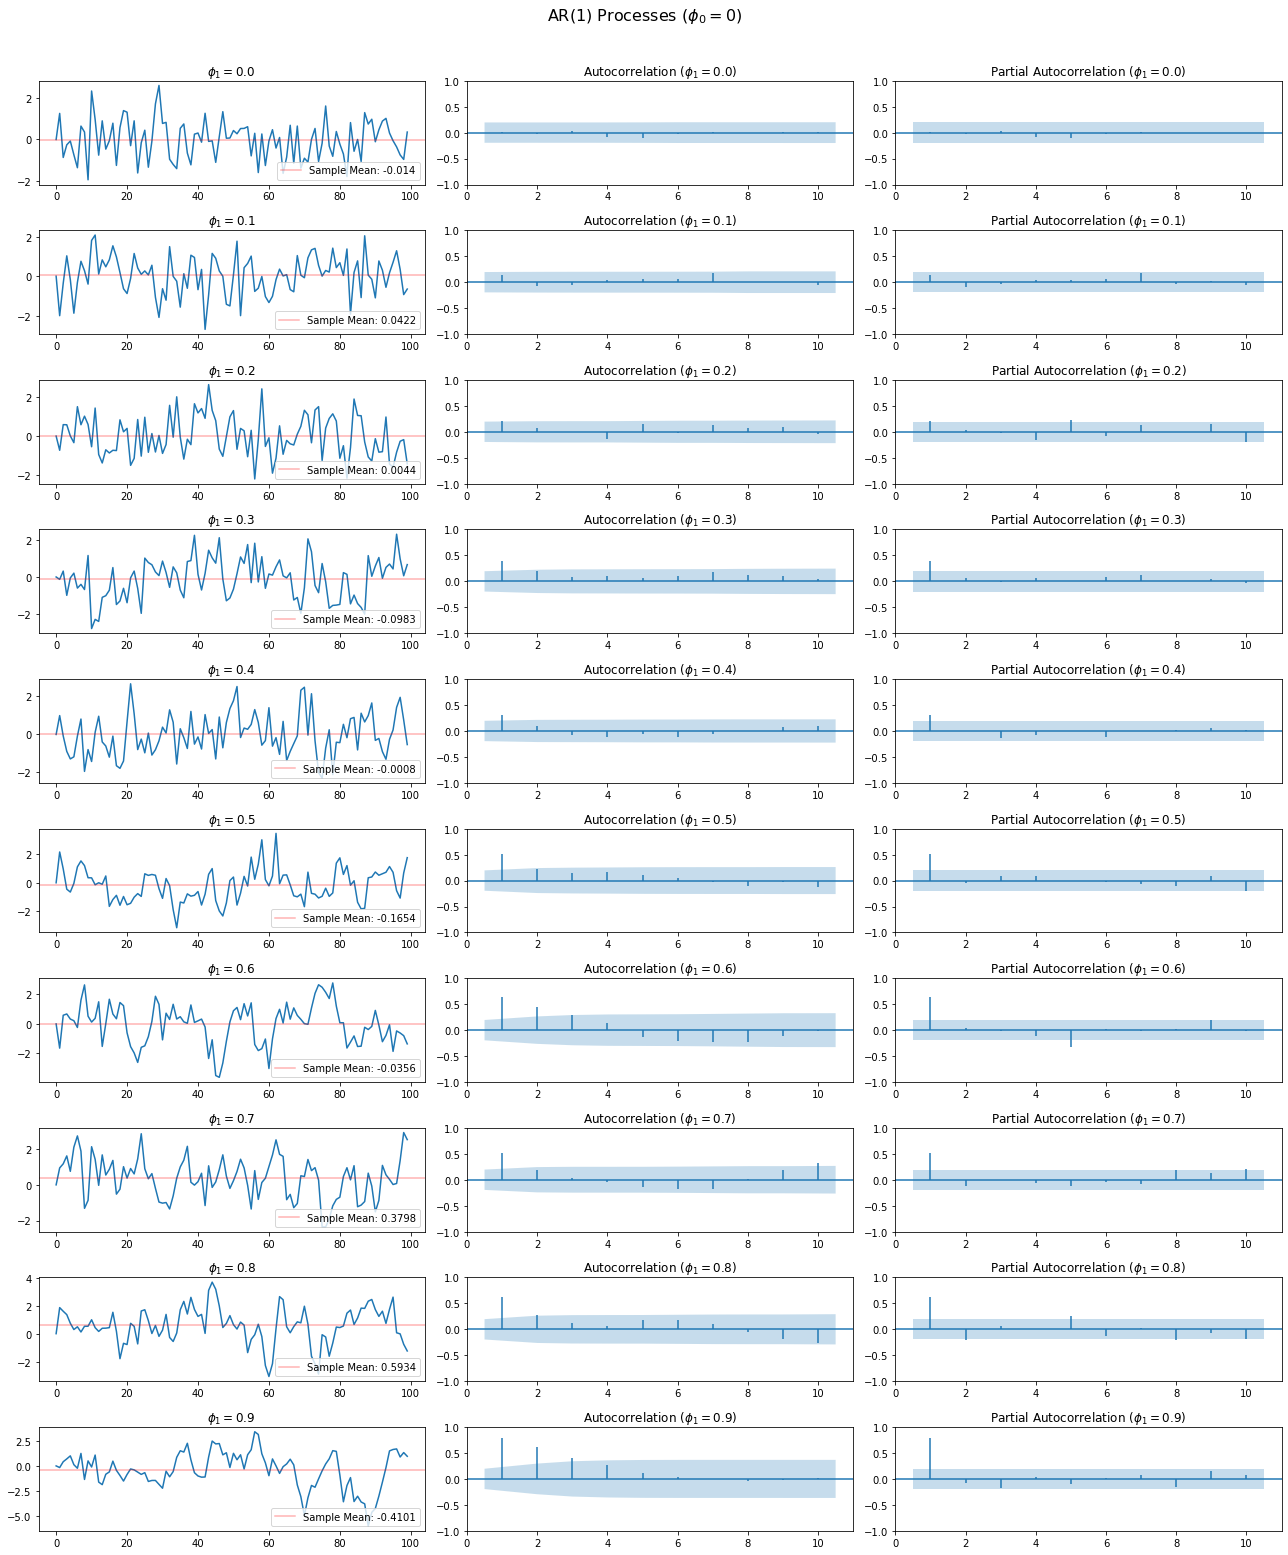

In [4]:
phi = [0.1 * i for i in range(10)]
n = 100

N_plots = len(phi)

fig, axes = plt.subplots(N_plots, 3, figsize=(18, 22))

for j in range(N_plots):
    ar1_series = AR1(phi[j], n)
    axes[j][0].plot(ar1_series)
    axes[j][0].axhline(np.mean(ar1_series), color='r', alpha=0.3, label=f'Sample Mean: {round(np.mean(ar1_series), 4)}')
    axes[j][0].set_title(f'$\phi_1 = {phi[j]:.1f}$')
    axes[j][0].legend(loc='lower right')
    
    plot_acf(ar1_series, ax=axes[j][1], lags=10, zero=False, marker=None)
    axes[j][1].set_title(f'Autocorrelation ($\phi_1 = {phi[j]:.1f}$)')
    
    plot_pacf(ar1_series, ax=axes[j][2], lags=10, zero=False, method='ywm', marker=None)
    axes[j][2].set_title(f'Partial Autocorrelation ($\phi_1 = {phi[j]:.1f}$)')


plt.suptitle('AR(1) Processes ($\phi_0 = 0$)', fontsize=16) 

plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()

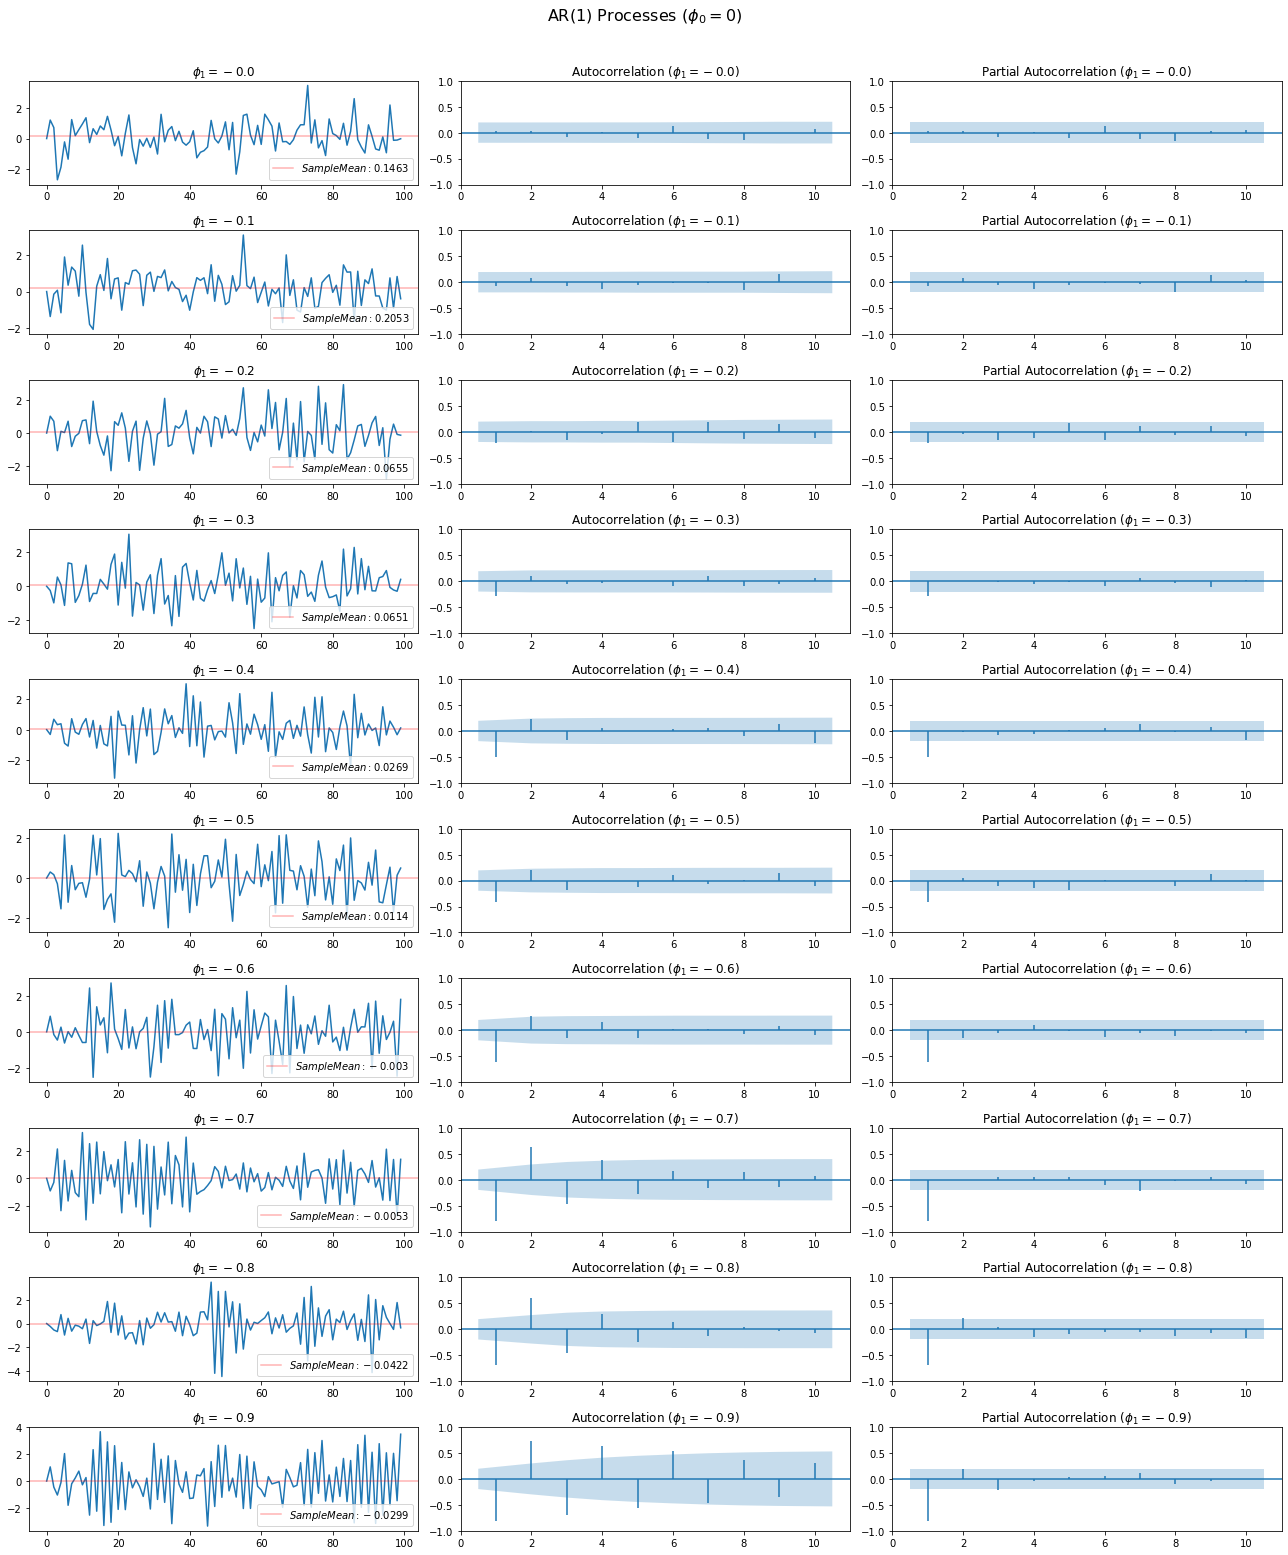

In [5]:
phi = [-0.1 * i for i in range(10)]
n = 100

N_plots = len(phi)

fig, axes = plt.subplots(N_plots, 3, figsize=(18, 22))

for j in range(N_plots):
    ar1_series = AR1(phi[j], n)
    axes[j][0].plot(ar1_series)
    axes[j][0].axhline(np.mean(ar1_series), color='r', alpha=0.3, label=f'$Sample Mean: {round(np.mean(ar1_series), 4)}$')
    axes[j][0].set_title(f'$\phi_1 = {phi[j]:.1f}$')
    axes[j][0].legend(loc='lower right')
    
    plot_acf(ar1_series, ax=axes[j][1], lags=10, zero=False, marker=None)
    axes[j][1].set_title(f'Autocorrelation ($\phi_1 = {phi[j]:.1f}$)')
    
    plot_pacf(ar1_series, ax=axes[j][2], lags=10, zero=False, method='ywm', marker=None)
    axes[j][2].set_title(f'Partial Autocorrelation ($\phi_1 = {phi[j]:.1f}$)')


plt.suptitle('AR(1) Processes ($\phi_0 = 0$)', fontsize=16) 

plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()

### AR(2) Model

$$r_t = \phi_0 + \phi_1 r_{t-1} + \phi_2 r_{t-2} + a_t$$ 

#### Mean
Using the same techniques at that of the AR(1) case,
$$ E(r_t) = \frac{\phi_0} {1 - \phi_1 - \phi_2} $$

provided that $\phi_1 + \phi_2 \neq 1$.

#### ACF
Using $\phi_0 = (1 - \phi_1 - \phi_2) \mu$, we can rewrite the AR(2) model as:
$$(r_t -\mu) =  \phi_1 (r_{t-1}-\mu) + \phi_2 (r_{t-2}-\mu) + a_t$$

Multiplying by $(r_{t-l} - \mu)$ and taking expectation, then
$$ \gamma_l = \phi_1 \gamma_{l-1} + \phi_2 \gamma_{l-2}, \;\;\; \rm{for} \;\;\; l>0$$

This is referred to as the **moment equation** of a stationary AR(2) model. Dividing the equation by $\gamma_0$,
$$ \rho_l = \phi_1 \rho_{l-1} + \phi_2 \rho_{l-2}, \;\;\; \rm{for} \;\;\; l>0$$

As $\rho_0 = 1$,
\begin{align}
\rho_1 &= \frac{\phi_1}{1 - \phi_2}\\
\rho_l &= \phi_1 \rho_{l-1} + \phi_2 \rho_{l-2}, \;\;\; l \geq 2
\end{align}

The ACF of a stationary AR(2) series satisfies the second-order difference equation:
$$ (1 - \phi_1 B - \phi_2 B^2 ) \rho_l = 0$$

where $B$ is called the back-shift operator (lag opearator) such that $B\rho_l = \rho_{l-1}$.

Corresponding to the prior difference equation, there is a second-order polynomial equation:
$$ 1 - \phi_1 x - \phi_2 x^2 = 0$$

solutions of this equation are
$$ x_{1, 2} = \frac{\phi_1 \pm \sqrt{\phi_1 ^2 + 4 \phi_2}}{-2 \phi_2}$$

Inverses of the two solutions are referred to as the **characteristic roots of the AR(2) model**. Denote the two characteristic roots by $\omega_1$ and $\omega_2$. More precisely, the inverses of these solutions, $\omega_1 = \frac{1}{x_1}$ and $\omega_2 = \frac{1}{x_2}$, respectively.

- AR(2) model can be factored as $(1-\omega_1 B) (1- \omega_2 B)$. The ACF of this is a mixture of two exponential decays.
- If $\phi_1 ^2 + 4\phi_2 > 0$, the roots $x_1$ and $x_2$ are real and distinct, leading to exponential decay in the ACF without oscillations.
- If $\phi_1 ^2 + 4\phi_2 < 0$, the roots $x_1$ and $x_2$ are complex conjugates, resulting in damped oscillations in the ACF. This condition implies that the ACF or $r_t$ will exhibit a pattern of damped sine and cosine waves, where the damping effect—how quickly the oscillations diminish.

In [6]:
def AR2(phi_1, phi_2, n):
    
    r = np.zeros(n)
    white_noise = rng.normal(0, 1, n)
    
    for t in range(2, n):
        # We assume that the phi_0 = 0
        r[t] = phi_1 * r[t-1] + phi_2 * r[t-2] + white_noise[t]
        
    return r

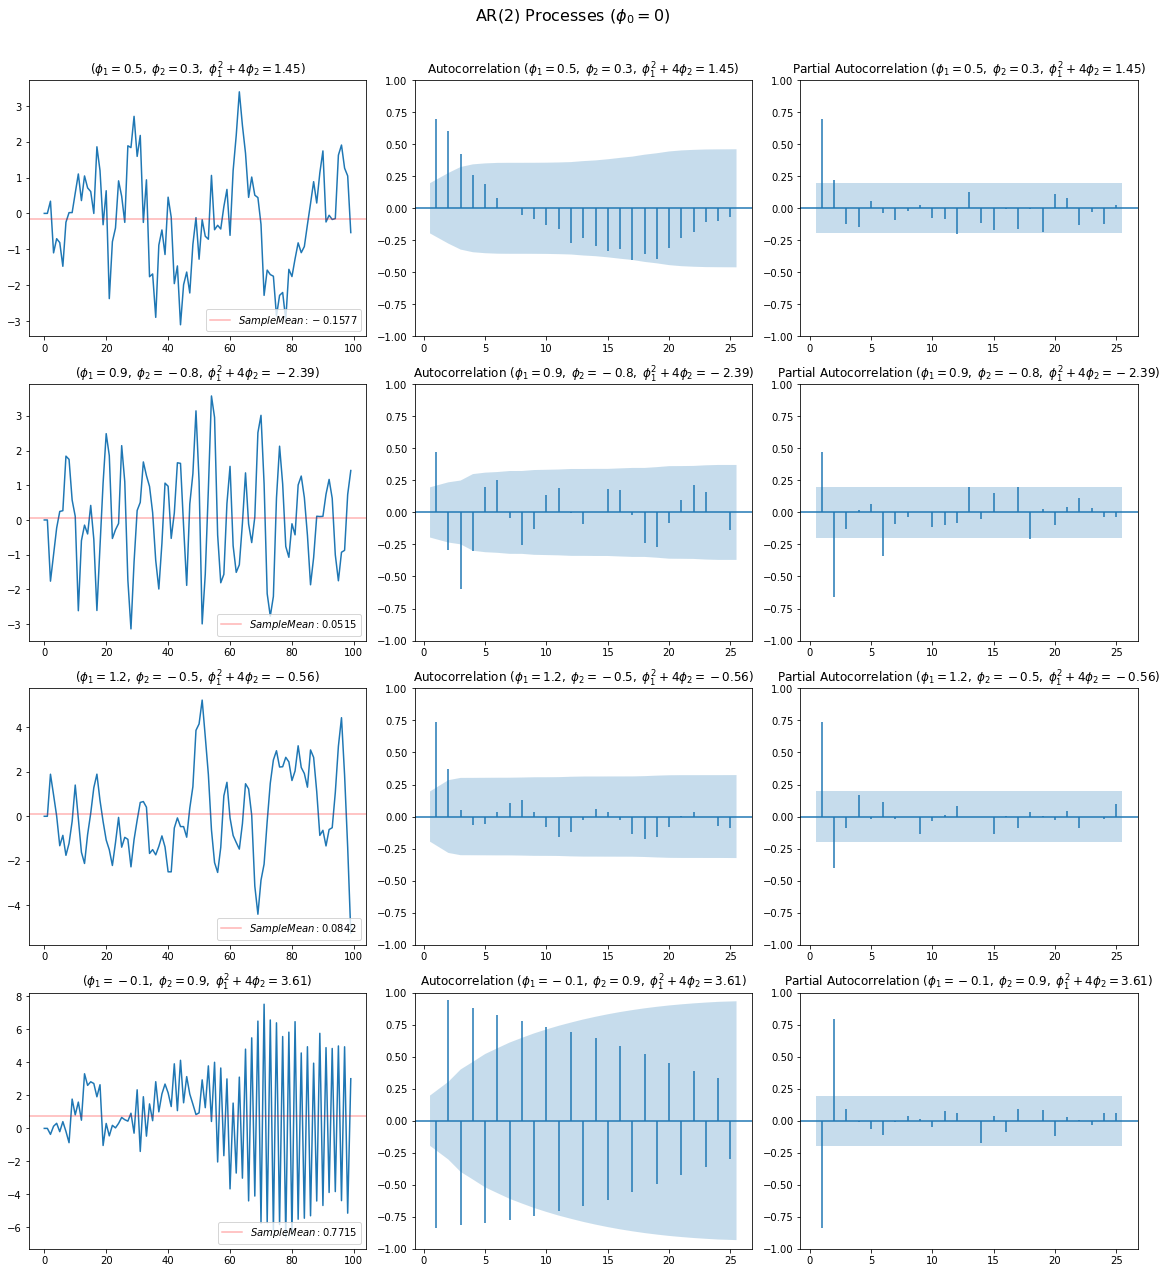

In [7]:
phi_1 = [0.5, 0.9, 1.2, -0.1]
phi_2 = [0.3, -0.8, -0.5, 0.9]

res = np.power(phi_1, 2) + np.dot(phi_2, 4)

n = 100

N_plots = len(phi_1)

fig, axes = plt.subplots(len(phi_1), 3, figsize=(16, 18))

for i in range(len(phi_1)):
    ar2_series = AR2(phi_1[i], phi_2[i], n)
    
    axes[i][0].plot(ar2_series)
    axes[i][0].axhline(np.mean(ar2_series), color='r', alpha=0.3, label=f'$Sample Mean: {round(np.mean(ar2_series), 4)}$')
    axes[i][0].set_title(f'($\phi_1 = {phi_1[i]:.1f}, \; \phi_2 = {phi_2[i]:.1f}, \; \phi_1 ^2 + 4\phi_2 = {res[i]:.2f}$)')
    axes[i][0].legend(loc='lower right')
    
    plot_acf(ar2_series, ax=axes[i][1], lags=25, zero=False, marker=None)
    axes[i][1].set_title(f'Autocorrelation ($\phi_1 = {phi_1[i]:.1f}, \; \phi_2 = {phi_2[i]:.1f}, \; \phi_1 ^2 + 4\phi_2 = {res[i]:.2f}$)')

    plot_pacf(ar2_series, ax=axes[i][2], lags=25, zero=False, marker=None, method='ywm')
    axes[i][2].set_title(f'Partial Autocorrelation ($\phi_1 = {phi_1[i]:.1f}, \; \phi_2 = {phi_2[i]:.1f}, \; \phi_1 ^2 + 4\phi_2 = {res[i]:.2f}$)')

    
plt.suptitle('AR(2) Processes ($\phi_0 = 0$)', fontsize=16) 

plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()

### AR(p)

#### Mean

The mean of a stationary series of AR(p) model is
$$ E(r_t) = \frac{\phi_0}{1 - \phi_1 - \cdots - \phi_p}$$

and the denominator is not zero.

The associated characteristic equation of the model is
$$ 1 - \phi_1x - \phi_2 x^2 - \cdots - \phi_p x^p = 0$$

**Stationarity requires that all characteristic roots are less than 1 in modulus**.

The solutions to this equation, $x_1, x_2, \dots, x_p$, can be real or complex numbers. These solutions are found by solving the polynomial equation, which might yield real roots, complex roots, or a combination of both.

If any of the solutions $x_i$ are complex, they will occur in conjugate pairs due to the real coefficients in the characteristic equation. The modulus of a complex number $a + bi$ is given by $\sqrt{a^2 + b^2}$. For real numbers, the modulus is simply its absolute value.

When the modulus of a characteristic root (inverse of a solution) is greater than 1, it indicates that the effects of shocks or perturbations in the time series diminish over time, allowing the process to return to its mean and exhibiting stable variance. If any characteristic root has a modulus less than or equal to 1, the AR(p) model would not be stationary, as it implies that shocks can have a lasting or unbounded effect on the future values of the series.

# 2. Example

In this section, I am using Kaggle's Sales Forecasting data and applying the AR(p) model to predict oil prices. I acknowledge that this model may not be entirely accurate, but I aim to organize the process of time series analysis for further studies.

### Import the data

In [8]:
df = pd.read_csv('oil.csv')
df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [10]:
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()

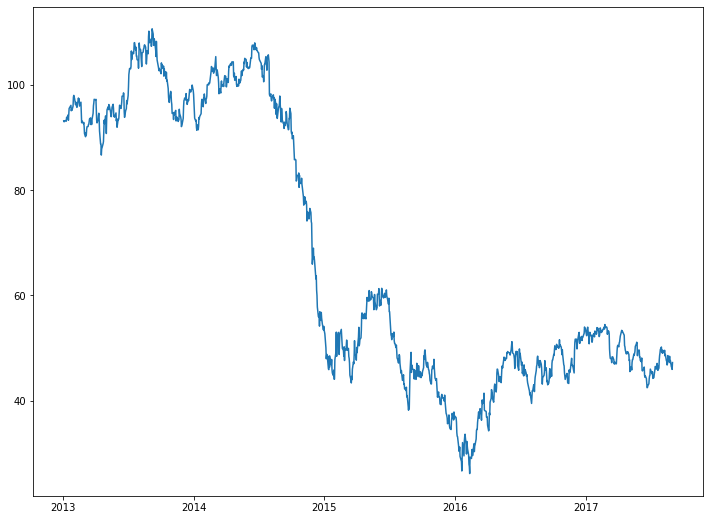

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(12, 9))
plt.plot(df.date, df.dcoilwtico)
plt.show()

In [12]:
df['fst'] = df["dcoilwtico"].diff()
df['snd'] = df['fst'].diff()

### The Augmented Dickey-Fuller test (Unit-Root Test)

In [13]:
from statsmodels.tsa.stattools import adfuller

# Use Train Set
list_diff = [df.dcoilwtico[:-12], df.fst[:-12].dropna(), df.snd[:-12].dropna()]

results = []

for i in range(3):
    adfuller_result = adfuller(list_diff[i], 
                      maxlag=None, 
                      regression='c', 
                      autolag='AIC', 
                      store=False, 
                      regresults=False)
    results.append([adfuller_result[0], adfuller_result[1]])

results = pd.DataFrame(results, 
                       index=['Original', '1st Diff', '2nd Diff'], 
                       columns=['ADF Statistics', 'p-value'])
results['ADF Statistics'] = results['ADF Statistics'].round(4)
results['p-value'] = results['p-value'].round(4)

results

,ADF Statistics,p-value
Original,-0.8734,0.7966
1st Diff,-36.1453,0.0000
2nd Diff,-12.9331,0.0000


Here, we are going to use the first difference. Let's divide the dataset into training and testing sets.

In [14]:
df.index = pd.DatetimeIndex(df.date)

train = df['fst'].iloc[:-12].dropna()
test = df['fst'].iloc[-12:]

print('# of TrainSet: ', len(train))
print(f'ln(Train) = {np.log(len(train)):.1f}')
print('# of TestSet: ', len(test))

# of TrainSet:  1162
ln(Train) = 7.1
# of TestSet:  12


---
### Ljung-Box Test

In [15]:
def Ljung_box(data, lags):
    # Ljung-box Statistics Q(5)
    ljung_box = acorr_ljungbox(data, 
                   lags=lags, 
                   boxpierce=False, 
                   model_df=0, 
                   period=None, 
                   return_df=True, 
                   auto_lag=False)
    
    ljung_box.columns = ['X-squared', 'p-value']
    ljung_box['X-squared'] = ljung_box['X-squared'].round(4)
    ljung_box['p-value'] = ljung_box['p-value'].round(4)
    ljung_box.index = [f'Q({i+1})' for i in range(lags)]
    ljung_box.index.name = 'Q(m)'
    return ljung_box

In [16]:
Ljung_box(train, 7)

,X-squared,p-value
Q(m),,
Q(1),4.1680,0.0412
Q(2),5.1660,0.0755
Q(3),6.1634,0.1039
Q(4),6.2077,0.1842
Q(5),6.6326,0.2494
Q(6),11.3767,0.0774
Q(7),11.4701,0.1194


As ln(T) = 7.1, the value of $m$ for the Ljung-Box test will be 7.

### ACF and PACF

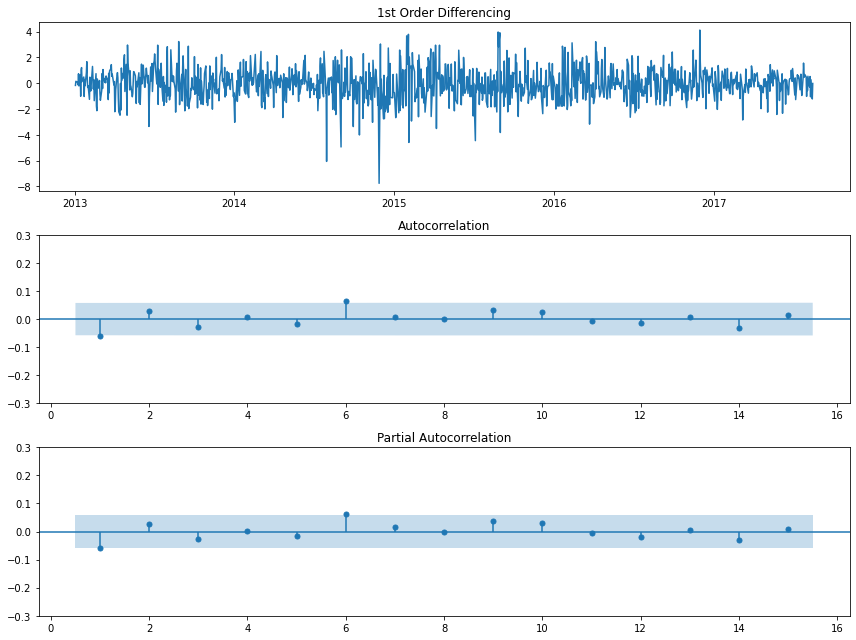

In [17]:
fig, axes = plt.subplots(3, 1, tight_layout=True, figsize=(12, 9))

# 1st Differencing
axes[0].plot(train) 
axes[0].set_title('1st Order Differencing')
plot_acf(train, ax=axes[1], zero=False, lags=15)
axes[1].set_ylim(-0.3, 0.3)
plot_pacf(train, ax=axes[2], zero=False, lags=15, method='ols')
axes[2].set_ylim(-0.3, 0.3)
plt.show()

We can observe that the lag 1 and 6 exceed the 5% confidence level in the PACF plot. Therefore, these will be the parameters of the AR(p) model.

### Fitting

Since our data index is not continuous, we may encounter a warning message when executing the Statsmodels code.

In [18]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

res = AutoReg(train, lags=[1, 6]).fit()

C:\Users\ypark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                    fst   No. Observations:                 1162
Model:              Restr. AutoReg(6)   Log Likelihood               -1875.695
Method:               Conditional MLE   S.D. of innovations              1.226
Date:                Mon, 08 Apr 2024   AIC                           3759.390
Time:                        19:34:37   BIC                           3779.601
Sample:                             6   HQIC                          3767.018
                                 1162                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0399      0.036     -1.106      0.269      -0.111       0.031
fst.L1        -0.0586      0.029     -1.999      0.046      -0.116      -0.001
fst.L6         0.0627      0.029      2.137      0.0

In [20]:
res.params

const    -0.039933
fst.L1   -0.058581
fst.L6    0.062664
dtype: float64

If all the solutions of the roots are greater than 1 in modulus, then the series of data is stationary.

In [21]:
print(f'The Mean of Stationary Series: {res.params[0]/(1 - res.params[1] - res.params[2]):.3f}')
print(f'Stanrdard Error of Residuals: {np.sqrt(res.sigma2):.3f}')

The Mean of Stationary Series: -0.040
Stanrdard Error of Residuals: 1.226


These values will be reiterated in the forecasting section as the forecast steps increase.

### Model Checking

In [22]:
Ljung_box(res.resid, 7)

,X-squared,p-value
Q(m),,
Q(1),0.0003,0.9860
Q(2),0.6552,0.7206
Q(3),1.5410,0.6729
Q(4),1.5412,0.8193
Q(5),1.8132,0.8743
Q(6),1.8183,0.9356
Q(7),2.1159,0.9531


In [23]:
round(1 - chi2.cdf(2.1687, 7 - 2), 4) # m - g

0.8253

For an AR(p) model, the Ljung-Box statistic $Q(m)$ follows asymptotically a chi-squared distribution with $m-g$ degrees of freedom, where $g$ denotes the number of AR coefficients used in the model. Since the lag-2 coefficient is not significant at the 5% level, we can conclude that the null hypothesis of no residual serial correlation in the first 7 lags is not rejected at the 5% level.

Therfore,

$$r_t = -0.04 -0.0586 r_{t-1} + 0.0627 r_{t-6} + a_t, \;\;\;\; \hat{\sigma}_a = 1.226$$

can be considered our final model.

### Forecasting

In [24]:
pred = res.get_prediction(len(train), len(train)+len(test)-1)


pred_df = pd.DataFrame({'Steps': range(1, 13),
                        'Forecast': np.round(pred.predicted_mean, 3),
                        'Actual': test.values,
                        'Std Error':np.round(pred.se_mean, 3)})
pred_df.set_index('Steps')

C:\Users\ypark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ypark\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\ypark\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Forecast,Actual,Std Error
Steps,,,
1,-0.058,-0.77,1.226
2,-0.004,0.27,1.228
3,-0.105,1.52,1.228
4,-0.017,-1.20,1.228
5,-0.115,0.26,1.228
6,-0.034,0.80,1.228
7,-0.042,-1.21,1.230
8,-0.038,0.41,1.230
9,-0.044,-1.25,1.230


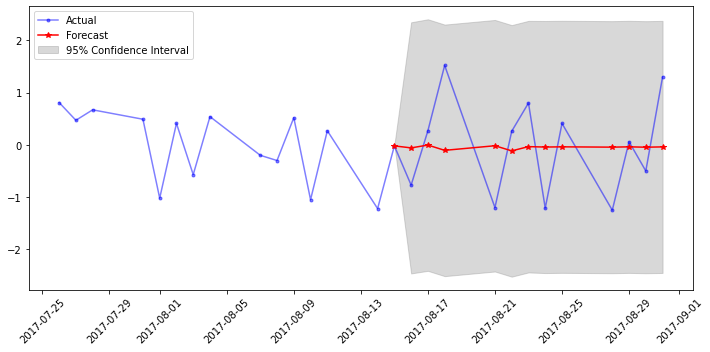

In [25]:
pred_values = pred_df.Forecast
pred_values.index = test.index
pred_data = pd.concat([train.iloc[-1:], pred_values])

plot_data = pd.concat([train.iloc[-1:], test])

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(train.iloc[-15:].index, train.iloc[-15:], color='b', marker='.', alpha=0.5)
ax.plot(plot_data.index, plot_data, label='Actual', color='b', marker='.', alpha=0.5)
ax.plot(pred_data.index, pred_data, label='Forecast', color='red', marker='*')

conf_int = pred.conf_int()
conf_int.loc[-1] = [0, 0]
conf_int.index = conf_int.index + 1
conf_int = conf_int.sort_index()

ax.fill_between(plot_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='grey', alpha=0.3, label='95% Confidence Interval')

ax.tick_params(axis='x', labelrotation=45)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The $l$-step ahead forecast, utilizing the minimum squared error loss function, is derived as:

$$\hat{r_h}(l) = \phi_0 + \sum_{i=1} ^p \phi_i \hat{r}_h(l - i), $$

where $\hat{r}_h (i) = r_{h+i}$. The $l$-step ahead forecast error is denoted as $e_h(l) = r_{h+l} - \hat{r}_h(l)$. In the case of a stationary AR(p) model, $\hat{r}_h(l)$ tends towards $E(r_t)$ as $l \rightarrow \infty$, signifying its convergence towards the unconditional mean. Additionally, the variance of the forecast error tends towards the unconditional variance of $r_t$ under the same conditions.

---

#### Reference:

[1] Tsay, R.S., 2010. Analysis of Financial Time Series. 3rd ed. Hoboken, NJ: Wiley.

[2] Hyndman, R.J. and Athanasopoulos, G., 2018. Forecasting: Principles and Practice. 2nd ed. Melbourne, Australia: OTexts. Available at: https://otexts.com/fpp2/.